In [1]:
!pip install nltk

In [2]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [31]:
import tensorflow as tf
import numpy as np

# Sample data (replace with your actual data)
data = np.random.rand(100, 1)

# Function to create sequences for training
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i+seq_length), 0])
        y.append(data[i+seq_length, 0])
    return np.array(X), np.array(y)

# Define sequence length
seq_length = 10

# Create sequences from the data
X, y = create_sequences(data, seq_length)

# Reshape input data to 3D format (batch_size, seq_length, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Define the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(seq_length, 1)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X, y, epochs=10, batch_size=32)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2511
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1675 
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1253 
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0981 
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0981 
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1152 
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1033 
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1020 
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0906 
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0932 


In [4]:
from nltk.tokenize import sent_tokenize

with open('Alice.txt', 'r') as f:
    text = f.read()

sentences = sent_tokenize(text)


In [5]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

preprocessed_sentences = []

for sentence in sentences:
    words = sentence.lower().split()
    filtered_words = [word for word in words if word not in stop_words]
    preprocessed_sentences.append(filtered_words)


In [6]:
import pandas as pd
import numpy as np

# Generate random data
data = {'Value': np.random.randn(1000)}

# Create a DataFrame
df = pd.DataFrame(data)

# Save as CSV
df.to_csv('dataset.csv', index=False)

print("Dataset.csv created successfully!")

Dataset.csv created successfully!


In [7]:
import pandas as pd

# Load dataset
data = pd.read_csv('dataset.csv')

# Split into train and test sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]


In [8]:

from sklearn.preprocessing import MinMaxScaler

# Normalize data
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)


In [32]:

import numpy as np

def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define sequence length
seq_length = 50

# Create sequences for training set
X_train, y_train = create_sequences(train_data, seq_length)

# Create sequences for testing set
X_test, y_test = create_sequences(test_data, seq_length)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Reshape input data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


(750, 50, 1)
(750, 1)
(150, 50, 1)
(150, 1)


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [11]:
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:

model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=64, return_sequences=True))


In [13]:

model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')


In [14]:

model.compile(loss='mean_squared_error', optimizer='adam')


In [21]:

history = model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)


Epoch 1/100
750/750 - 9s - 12ms/step - loss: 0.0257
Epoch 2/100
750/750 - 10s - 13ms/step - loss: 0.0259
Epoch 3/100
750/750 - 7s - 9ms/step - loss: 0.0259
Epoch 4/100
750/750 - 11s - 15ms/step - loss: 0.0258
Epoch 5/100
750/750 - 11s - 15ms/step - loss: 0.0259
Epoch 6/100
750/750 - 9s - 12ms/step - loss: 0.0258
Epoch 7/100
750/750 - 8s - 11ms/step - loss: 0.0258
Epoch 8/100
750/750 - 10s - 13ms/step - loss: 0.0259
Epoch 9/100
750/750 - 7s - 10ms/step - loss: 0.0259
Epoch 10/100
750/750 - 10s - 14ms/step - loss: 0.0255
Epoch 11/100
750/750 - 8s - 11ms/step - loss: 0.0258
Epoch 12/100
750/750 - 7s - 9ms/step - loss: 0.0256
Epoch 13/100
750/750 - 8s - 11ms/step - loss: 0.0258
Epoch 14/100
750/750 - 7s - 9ms/step - loss: 0.0259
Epoch 15/100
750/750 - 10s - 14ms/step - loss: 0.0257
Epoch 16/100
750/750 - 11s - 14ms/step - loss: 0.0258
Epoch 17/100
750/750 - 8s - 11ms/step - loss: 0.0258
Epoch 18/100
750/750 - 9s - 12ms/step - loss: 0.0258
Epoch 19/100
750/750 - 10s - 14ms/step - loss: 0.02

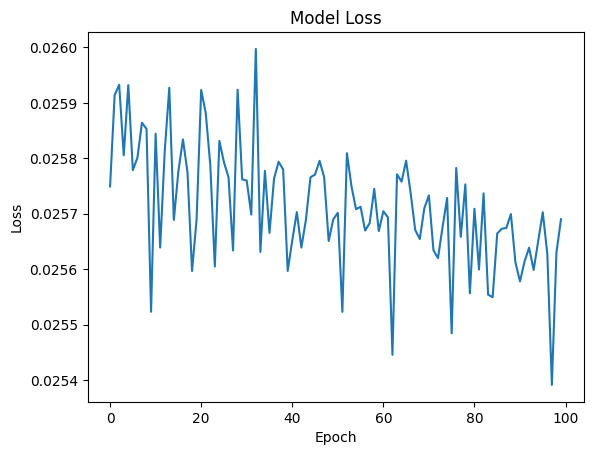

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


In [25]:
import math

trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))


Train Score: 0.03 MSE (0.16 RMSE)
Test Score: 0.03 MSE (0.18 RMSE)


In [41]:
test_data.shape
test_labels = test_data[:, 0]
test_labels.shape

(200,)

In [43]:
loss = model.evaluate(test_data, test_labels)
print("Loss:", loss)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2620 
Loss: 0.2544357180595398
